RNN(Recurrent Neural Network)
===
시퀀스 배열로 다루는 순환 신경망
---
#### 1. 순서형 자료와 순환 신경망
* 인공지능이 문장을 듣고 이해한다는 것은 많은 문장을 이미 학습해 놓았다는 것.
    * 하지만 문장을 학습하는 것은 이전까지의 과정과 조금 다름.
    * 문장은 여러 개의 단어로 이루어져 있으므로, 그 의미를 전달하려면 각 단어가 정해진 순서대로 입력되어야 하기 때문임.
* 즉, 여러 데이터가 순서와 관계없이 입력되던 것과는 다르게, 이번에는 과거에 입력된 데이터와 나중에 입력된 데이터 사이의 관계를 고려해야 하는 문제가 생기는 것.
    * 이를 해결하기 위해 순환 신경망(RNN) 방법이 고안됨.
    * 순환 신경망은 여러 개의 데이터가 순서대로 입력되었을 때 앞서 입력받은 데이터를 잠시 기억해 놓는 방법.
    * 그리고 기억된 데이터가 얼마나 중요한지를 판단하여 별도의 가중치를 줘서 다음 데이터로 넘어감.
    * 모든 입력 값에 이 작업을 순서대로 실행하므로 다음 층으로 넘어가기 전에 같은 층을 맴도는 것처럼 보임.
        * 이렇게 같은 층 안에서 맴도는 성질 때문에 순환 신경망이라고 부름.
* 예를 들어 인공지능 비서에게 "오늘 주가가 몇이야?" 라고 묻는다면,
    * 모형의 순환 부분에서 단어를 하나 처리할 때마다 단어마다 기억하여 다음 입력 값의 출력을 결정함.
    * [입력1:오늘] → [모형] → [결과1:['오늘'에 대한 결과]&[기억1]]   
      [입력2:주가가] → [모형]+[기억1] → [결과2:['주가가'에 대한 결과]&[기억2]]    
      [입력3:몇이야?] → [모형]+[기억2] → [결과3:['몇이야'에 대한 결과]]
    * 순환이 되는 가운데 앞서 나온 입력에 대한 결과가 뒤에 나오는 입력 값에 영향을 줌.
    * 따라서 [입력2]의 값이 똑같이 '주가가'라 하더라도, [입력1]이 '오늘'인지 '어제'인지에 따라 계산이 달라지는 것.
$$h^{(t)}=\phi_h(W_{xh}x^{(t)}+W_{hh}h^{(t-1)}+b_h)\qquad\cdots\quad(1)$$
$$h^{(t)}=\phi_h(W_{h}[x^{(t)};h^{(t-1)}]+b_h)\;\qquad\qquad\cdots\quad(2)$$
$$o^{(t)}=\phi_o(W_{ho}h^{(t)}+b_o)\;\qquad\cdots\quad(final\ output)$$

#### 2. LSTM(Long Short Term Memory) 방법
* LSTM은 한 층 안에서 반복을 많이 해야 하는 RNN의 특성상 일반 신경망 보다 기울기 소실 문제가 더 많이 발생하고 이를 해결하기 어렵다는 단점을 보완한 방법.
* 즉, 반복되기 직전에 다음 층으로 기억된 값을 넘길지 안 넘길지를 관리하는 단계를 하나 더 추가하는 것.
#### 3. RNN 방식의 장점과 처리 예시
* RNN 방식의 장점은 입력값과 출력값을 어떻게 설정하느냐에 따라 다음과 같이 여러가지 상황에서 이를 적용할 수 있다는 것.
1. 다수입력 단일 출력
    * 예 : 문장을 읽고 뜻을 파악할 때 활용
    * [입력 및 처리:[["밥은"] → ["먹고"] → ["다니니?"]]] → [결과:[안부 인사]]
2. 단일 입력 다수 출력
    * 예 : 사진의 캡션을 만들 때 활용 / 음악 캡션 분석
    * [입력:["Wet Sand"]] → [처리 및 결과:["RHCP"],["Rock"],["Rythm"]]
3. 다수 입력 다수 출력
    * 예 : 문장을 번역할 때 활용
    * [입력:["예"] → ["그게"] → ["다에요"]] → [결과:["Yes"] → ["that's"] → ["all"]]
#### 4. 케라스의 제공 데이터
* 케라스는 딥러닝 학습에 필요한 데이터를 쉽게 내려받을 수 있게 load_data() 함수를 제공.
* MNIST 데이터셋 외에도 RNN 학습에 적절한 텍스트 대용량 데이터를 제공.
* 케라스가 제공하는 '로이터 뉴스 카테고리 분류'와 'IMDB 영화 리뷰'를 활용 가능.

In [29]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(3)

rnn_layers = keras.layers.SimpleRNN(units=2, use_bias=True, return_sequences=True)
rnn_layers.build(input_shape=(None, None, 5))
w_xh, w_oo, b_h = rnn_layers.weights

print(f"w_xh의 크기: {w_xh}")
print(f"w_oo의 크기: {w_oo}")
print(f"b_h의 크기: {b_h}")

w_xh의 크기: <tf.Variable 'simple_rnn_cell_6/kernel:0' shape=(5, 2) dtype=float32, numpy=
array([[-0.678324  ,  0.12563956],
       [-0.00679237, -0.89459175],
       [ 0.00840968,  0.4605608 ],
       [-0.6844831 , -0.30438203],
       [ 0.28131545, -0.04416442]], dtype=float32)>
w_oo의 크기: <tf.Variable 'simple_rnn_cell_6/recurrent_kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[ 0.66622615, -0.7457498 ],
       [ 0.7457498 ,  0.66622615]], dtype=float32)>
b_h의 크기: <tf.Variable 'simple_rnn_cell_6/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>


### 1. LSTM을 이용한 로이터 뉴스 카테고리 분류하기
#### 1. 문장의 의미 파악의 정의
* 입력된 문장의 의미를 파악하는 것은 곧 모든 단어를 종합하여 하나의 카테고리로 분류하는 작업이라고 할 수 있음.
* 예를 들어 "안녕, 오늘 날씨가 참 좋네."라는 말은 '인사'카테고리에 분류해야 함.
* 그리고 다음의 예시와 같이 조금 더 길고 전문적인 말도 정확하게 분류해야 함.
    * 중부 지방은 대체로 맑겠으나, 남부 지방은 구름이 많겠습니다. → 날씨
    * 올 초부터 유동성의 힘으로 주가가 일정하게 상승했습니다. → 주식 등
#### 2. 실습
##### 1. 데이터 로드와 해석
* 실습 내용은 위와 같이 긴 텍스트를 읽고 이 데이터가 어떤 의미를 지니는지 카테고리로 분류하는 연습.
* 실습을 위해 로이터 뉴스 데이터를 사용.
* 로이터 뉴스 데이터는, 총 11,258개의 뉴스 기사가 46개의 카테고리로 나누어진 대용량 텍스트 데이터.
* 데이터는 케라스를 통해 다음과 같이 불러올 수 있음.


In [30]:
# 로이터 뉴스 데이터셋 불러오기
from tensorflow.keras.datasets import reuters

import numpy as np

# 자동 완성용 라이브러리
from keras.datasets import reuters

# 불러온 데이터를 학습셋과 테스트셋으로 나눔
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [31]:
# 데이터 확인
category = np.max(y_train) +1
print(f"카테고리 갯수 : {category}")
print(f"학습용 뉴스 기사 수 :{len(X_train)}")
print(f"테스트용 뉴스 기사 수 :{len(X_test)}")
print(X_train[0])

카테고리 갯수 : 46
학습용 뉴스 기사 수 :8982
테스트용 뉴스 기사 수 :2246
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


* print(X_train[0])에서 기사가 아닌 [1,2,2,8,43,...]과 같은 숫자 배열이 나옴.
* 이는 데이터 안에서 해당 단어가 몇 번이나 나타나는지 세어 빈도에 따라 번호를 붙인 것.
    * 예를 들어, 3이라고 하면 세 번째로 빈도가 높은 단어라는 뜻임.
* 이러한 작업을 위해서 tokenizer() 같은 함수를 이용하는데, 본 데이터는 이미 토큰화 작업을 마친 데이터를 제공해줌.
* 이때, 기사 안의 단어 중에서는 거의 사용되지 않는 것들도 있으므로, 모든 단어를 다 사용하는 것은 비효율적. → 빈도가 높은 단어만 불러와 사용.
* __num_word__ 인자에 따라 빈도수 상위 1~1000에 해당하는 단어만 선택해서 불러오는 것.
##### 2. 전처리
* 또 하나 주의해야 할 점은 각 기사의 단어 수가 제각각 다르므로 단어의 숫자를 맞춰줘야 함.
* 이때는 데이터 전처리 함수 sequendce()를 사용
* maxlen = 100은 단어 수를 100개로 맞추라는 뜻.
    * 입력된 기사의 단어 수가 100보다 크면 100개째 단어만 선택하고 나머지는 버림.
    * 입력된 기사의 단어 수가 100 에서 모자랄 때는 모자라는 부분을 모두 0 으로 채움.

In [32]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, GRU
import tensorflow as tf

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM

# seed 설정
np.random.seed(3)
tf.random.set_seed(3)


# 데이터 전처리
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

# y 데이터에 원-핫 인코딩 처리를 하여 데이터 전처리 과정을 마침
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 모형 설정
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation="tanh"))
# GRU 알고리즘 활용할 경우 add 뒤에 단어만 바꿔주면 됨.
# model.add(GRU(100, activation="tanh"))
model.add(Dense(46, activation="softmax"))

* Embedding 층과 LSTM 층이 새로 추가됨.
    * Embedding 층은 데이터 전처리 과정을 통해 입력된 값을 받아 다음층이 알아들을 수 있는 형태로 변환하는 역할을 함.
    * Embedding('불러온 단어의 총개수', '기사당 단어 수')형식으로 사용하며, 모델 설정 부분의 맨 처음에 있어야 함.
* LSTM은 앞서 설명과 같이, RNN에서 기억 값에 대한 가중치를 제어함.
    * LSTM('기사당 단어 수', '기타 옵션')의 형태로 적용됨
    * LSTM의 활성화 함수로는 Tanh 사용.

In [33]:
# 모델의 컴파일
model.compile(loss="categorical_crossentropy",
            optimizer='adam',
            metrics=["accuracy"])

# 모델의 실행
history = model.fit(X_train, y_train, batch_size=100, epochs=20, validation_data=(X_test, y_test))

# 테스트 정확도 출력
print(f"\n Test Accuracy : {model.evaluate(X_test, y_test)[1]:.4f}")

Epoch 1/20
90/90 [==============================] - 8s 78ms/step - loss: 2.5167 - accuracy: 0.3633 - val_loss: 1.9989 - val_accuracy: 0.4412
Epoch 2/20
90/90 [==============================] - 7s 76ms/step - loss: 1.8754 - accuracy: 0.4845 - val_loss: 1.8038 - val_accuracy: 0.5347
Epoch 3/20
90/90 [==============================] - 8s 84ms/step - loss: 1.7028 - accuracy: 0.5577 - val_loss: 1.7001 - val_accuracy: 0.5654
Epoch 4/20
90/90 [==============================] - 8s 90ms/step - loss: 1.6181 - accuracy: 0.5884 - val_loss: 1.6731 - val_accuracy: 0.5775
Epoch 5/20
90/90 [==============================] - 8s 92ms/step - loss: 1.5621 - accuracy: 0.6003 - val_loss: 1.6068 - val_accuracy: 0.5922
Epoch 6/20
90/90 [==============================] - 8s 92ms/step - loss: 1.4900 - accuracy: 0.6260 - val_loss: 1.5624 - val_accuracy: 0.6082
Epoch 7/20
90/90 [==============================] - 8s 90ms/step - loss: 1.4511 - accuracy: 0.6383 - val_loss: 1.5407 - val_accuracy: 0.6207
Epoch 8/20
90

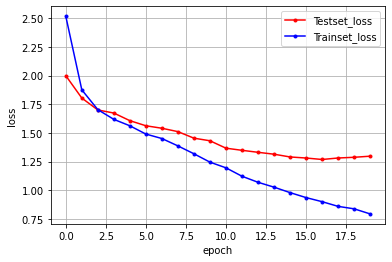

In [34]:
import matplotlib.pyplot as plt

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history["loss"]

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker=".", c="red", label="Testset_loss")
plt.plot(x_len, y_loss, marker=".", c="blue", label="Trainset_loss")

# 그래프에 그리드를 주고 레이블을 표시
plt.legend()
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

* 테스트셋에 대한 정확도가 0.7119를 보이고 있음.
    * GRU는 0.6972.
* 테스트 오차가 상승하기 전까지의 학습과정이 과적합 직전의 최적 학습 시간.